# Train a model on Parkinson telemonitoring data

## Retrieve data

In [13]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
parkinson = fetch_ucirepo(id=189)
df = parkinson.data
  
# data (as pandas dataframes) 
X = parkinson.data.features 
y = parkinson.data.targets 
y_motor = y.motor_UPDRS	
y_total = y.total_UPDRS
  
# variable information 
parkinson.variables

,name,role,type,demographic,description,units,missing_values
0,subject#,ID,Integer,None,Integer that uniquely identifies each subject,None,no
1,age,Feature,Integer,Age,Subject age,None,no
2,test_time,Feature,Continuous,None,Time since recruitment into the trial. The int...,None,no
3,Jitter(%),Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
4,Jitter(Abs),Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
5,Jitter:RAP,Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
6,Jitter:PPQ5,Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
7,Jitter:DDP,Feature,Continuous,None,Several measures of variation in fundamental f...,None,no
8,Shimmer,Feature,Continuous,None,Several measures of variation in amplitude,None,no
9,Shimmer(dB),Feature,Continuous,None,Several measures of variation in amplitude,None,no


In [2]:
df = pd.concat([X, y], axis=1)
df

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,...,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,motor_UPDRS,total_UPDRS
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,...,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0,28.199,34.398
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,...,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0,28.447,34.894
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,...,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0,28.695,35.389
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,...,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0,28.905,35.810
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,...,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0,29.187,36.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,...,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,0,22.485,33.485
5871,61,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,...,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,0,21.988,32.988
5872,61,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,...,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,0,21.495,32.495
5873,61,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,...,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,0,21.007,32.007


## Train model

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

   age  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0   72     5.6431    0.00662     0.000034     0.00401      0.00317   
1   72    12.6660    0.00300     0.000017     0.00132      0.00150   
2   72    19.6810    0.00481     0.000025     0.00205      0.00208   
3   72    25.6470    0.00528     0.000027     0.00191      0.00264   
4   72    33.6420    0.00335     0.000020     0.00093      0.00130   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  ...  Shimmer:APQ11  \
0     0.01204  0.02565        0.230       0.01438  ...        0.01662   
1     0.00395  0.02024        0.179       0.00994  ...        0.01689   
2     0.00616  0.01675        0.181       0.00734  ...        0.01458   
3     0.00573  0.02309        0.327       0.01106  ...        0.01963   
4     0.00278  0.01703        0.176       0.00679  ...        0.01819   

   Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  sex  motor_UPDRS  \
0      0.04314  0.014290  21.640  0.41888  0.54842  0.16006

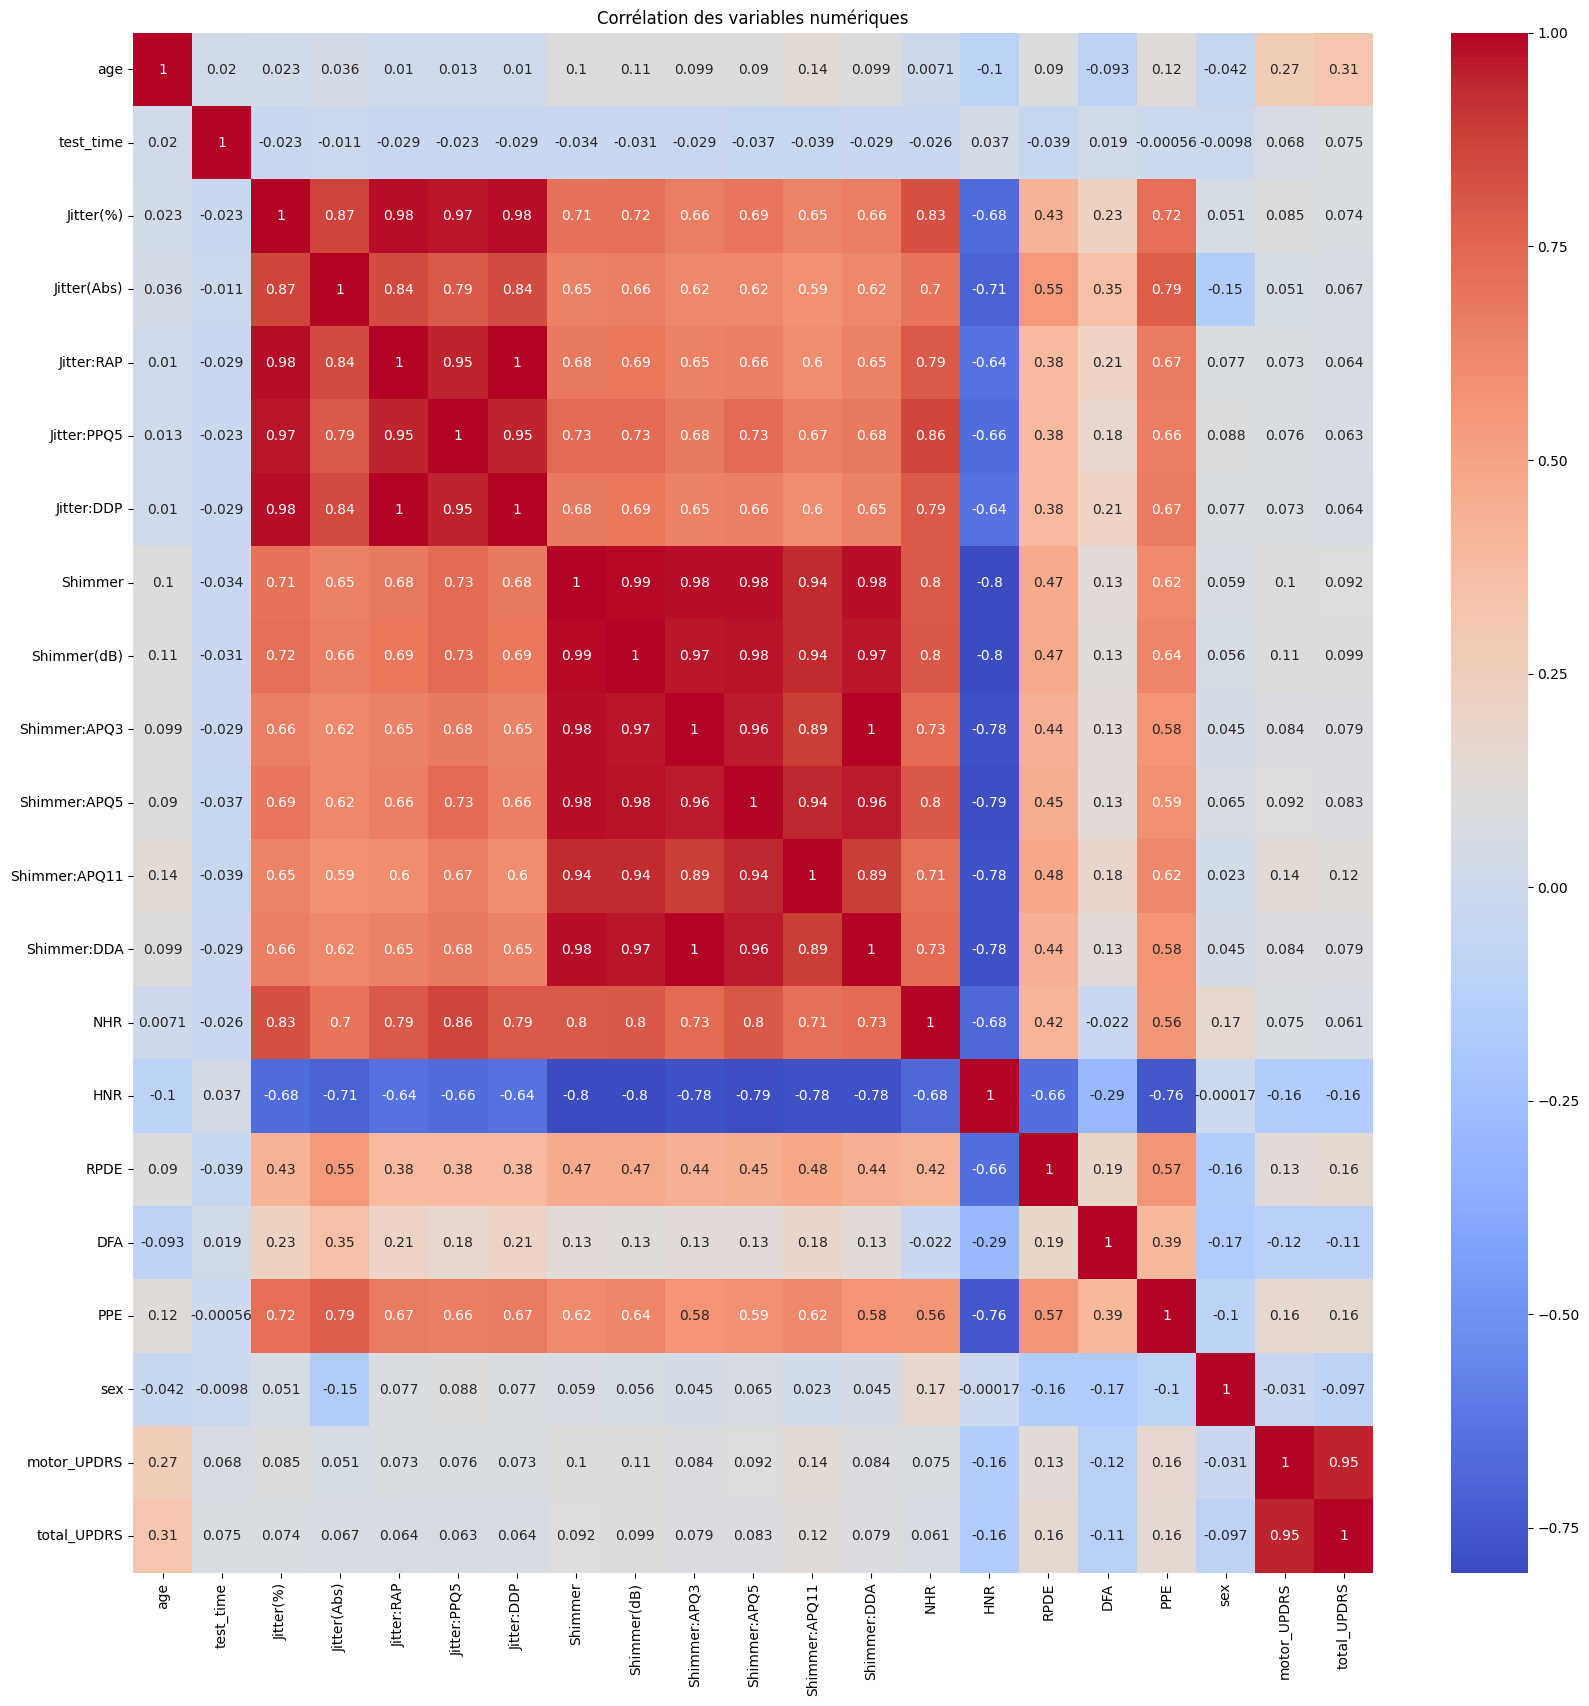

In [4]:
# Exploration minimale
print(df.head())
print(df.info())
print(df.describe())

# sns.pairplot(df.sample(200), diag_kind='kde')
# plt.suptitle("Pairplot de l'échantillon", y=1.02)
# plt.show()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélation des variables numériques")
plt.show()

In [5]:
# Prétraitement : uniquement numérique, donc normalisation
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.columns)
])

In [6]:
# Modèles à tester
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement et évaluation
trained_models = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"\n=== {name} ===")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    
    trained_models[name] = pipeline


=== LinearRegression ===
RMSE: 8.64
R² Score: 0.14

=== RandomForest ===
RMSE: 1.36
R² Score: 0.98

=== XGBoost ===
RMSE: 1.86
R² Score: 0.96


# Explicabilité SHAP

In [14]:
# Prétraitement
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), X.columns)
])

# Modèle XGBoost (on le prendra pour SHAP)
model = XGBRegressor(n_estimators=100, random_state=42)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_motor, test_size=0.2, random_state=42)

# Entraînement
pipeline.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = pipeline.predict(X_test)
print(f"XGBoost - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"XGBoost - R² Score: {r2_score(y_test, y_pred):.2f}")


XGBoost - RMSE: 1.62
XGBoost - R² Score: 0.96


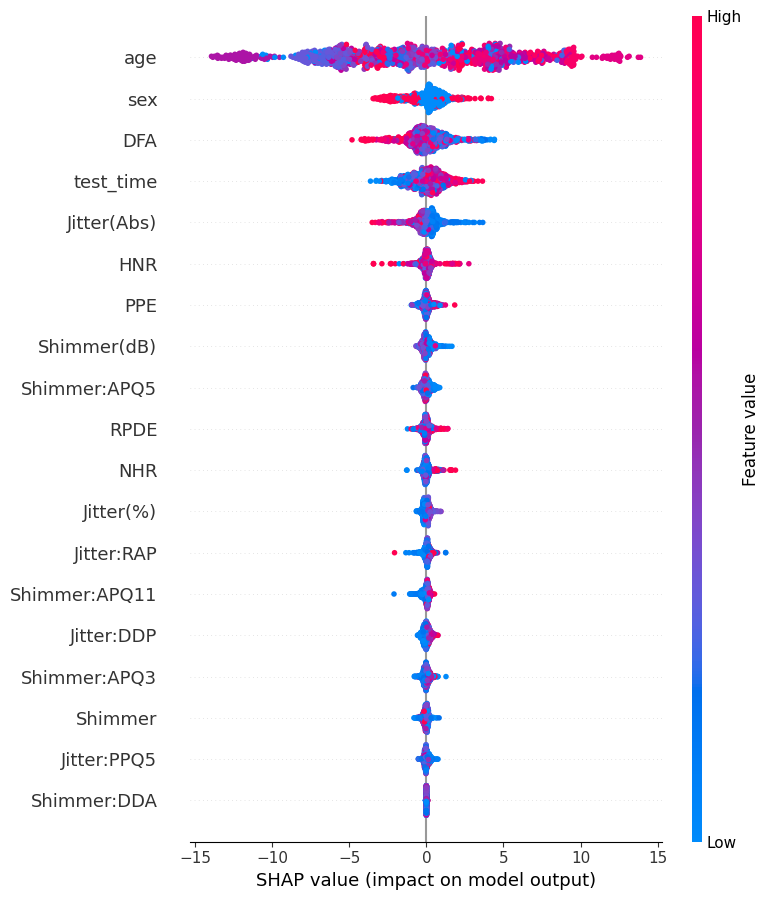

In [15]:
import shap

# Prétraitement séparé pour retrouver les données transformées
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# SHAP explainer pour arbres (XGBoost ici)
explainer = shap.Explainer(model)
shap_values = explainer(X_test_transformed)

# Résumé global
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=X.columns)

In [54]:
import shap
import ipywidgets as widgets
from IPython.display import display, HTML

# Init JS pour les plots interactifs
shap.initjs()

# Force plot interactif avec fond blanc
def show_force_plot(index):
    force_plot = shap.force_plot(
        explainer.expected_value,
        shap_values[index].values,
        features=X_test_transformed[index],
        feature_names=X.columns,
        matplotlib=False  # version JavaScript interactive
    )
    
    html = f"""
    <div style='background-color:white;padding:10px'>
        {force_plot.html()}
    </div>
    """
    display(HTML(html))

# Slider pour choisir l’index
index_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(X_test_transformed) - 1,
    step=1,
    description='Index:',
    continuous_update=False
)

# Affichage interactif
widgets.interact(show_force_plot, index=index_slider);


interactive(children=(IntSlider(value=0, continuous_update=False, description='Index:', max=1174), Output()), …